### Theory: Fourier Series 

1. Fourier series are defind on a periodic function

2. If $f(x)$ is periodic (let's say $2 \pi$ periodic) and piecewise smooth, it can be written in terms of fourier series.

* $f(x) = \frac{a_0}{2} + \sum_{k=1}^{\infty} (a_k cos(kx) + b_k sin(kx))$

* Here, the coefficients are given by: $a_k = \frac{1}{\pi} \int_{\pi}^{-\pi} f(x) cos(kx) dx$  and  $b_k = \frac{1}{\pi} \int_{\pi}^{-\pi} f(x) sin(kx) dx$

3. If fourier series is L periodic, then

* $f(x)= \frac{a_0}{2} + \sum_{k=1}^{\infty} (a_k cos(\frac{ 2 \pi k x}{L}) + b_k sin(\frac{ 2 \pi k x}{L}))$

* where, $a_k = \frac{2}{L} \int_{0}^{L} f(x) cos(\frac{2 \pi k x}{L}) dx$ and $b_k = \frac{2}{L} \int_{0}^{L} f(x) sin(\frac{2 \pi k x}{L}) dx$

4. Exponential representation of fourier series:

* $f(x) = \sum_{k=-\infty}^{\infty} c_k e^{ikx}$, where $c_k = \frac{1}{2 \pi} \int_{-\pi}^{\pi} f(x) e^{-ikx} dx$



In [29]:
import sympy as sp
import numpy as np 
import matplotlib.pyplot as plt

### The normalization constant 

In [30]:
# intergration of sin^2 from [0,2pi]
k = sp.Symbol('k',positive=True,integer=True)
x = sp.Symbol('x',relal=True)
sp.integrate(sp.sin(k * x)**2,(x,0,2*sp.pi)).simplify()

pi

In [31]:
# intergration of cos^2 from [0,2pi]
sp.integrate(sp.cos(k * x)**2,(x,0,2*sp.pi)).simplify()

pi

### Ex:1 Approximate hat fucntion using fourier series 

In [37]:
# Let's define hat function 
dx = 0.001    
L  = np.pi    
x = L*np.arange(-1,1+dx,dx)  
n = len(x)                   
n_quart = int(np.floor(n/4)) 

# hat function 
f = np.zeros_like(x)         
f[n_quart:2*n_quart] = np.arange(1,n_quart +1 )/n_quart
f[2*n_quart:3*n_quart] = 1- np.arange(1,n_quart+1)/n_quart

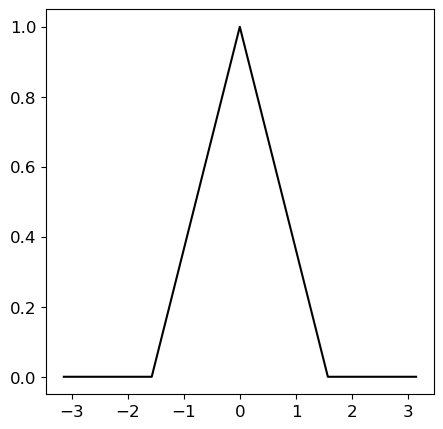

In [38]:
# plot the hat function 
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams.update({'font.size': 12})
fig,ax = plt.subplots()
ax.plot(x,f,'k-')

In [39]:
# find the fourier series sum (using k values upto 20)

k_max = 20              # maximum no of k values 

a  = np.zeros(k_max+1)  # cos coef.
b  = np.zeros(k_max+1)  # sin coef.
a[0] = np.sum(f) * dx

fFS = a[0]/2
for k in range(1,k_max +1):
    a[k] = np.sum(f * np.cos(k*x)) * dx # a_k 
    b[k] = np.sum(f * np.sin(k*x)) * dx # b_k

    fFS = fFS + a[k] * np.cos(k*x) + b[k] *np.sin(k*x) 

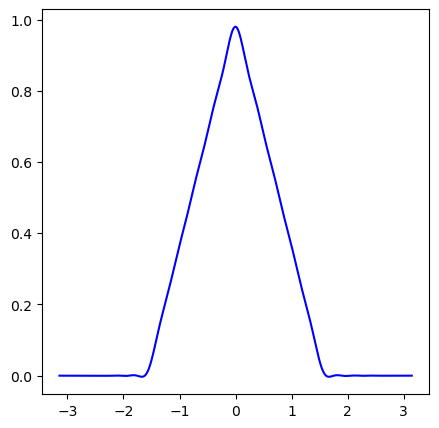

In [40]:
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams.update({'font.size': 10})
plt.plot(x,fFS,'b-')

### Ex 2: Let's use fourier series to approximate step function (To show Gibbs phenomina)
* ringing at discontinous $f(x)$ and the fourior series sum is finite $(\lt \infty)$

In [41]:
dx = 0.001 
L  = 2* np.pi 
x  = np.arange(0,L+dx,dx)
n  = len(x) 
n_one_third = int(np.floor(n/3))

# create the step function 
f = np.zeros_like(x)
f[n_one_third:2*n_one_third] = 1 

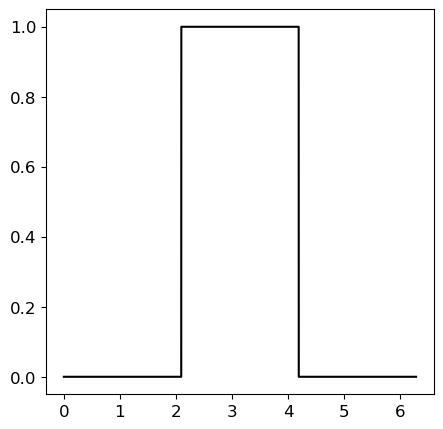

In [42]:
# let's plot step function 
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams.update({'font.size': 12})
plt.plot(x,f,'k-')

In [44]:
# Let's approximate the step function using 100 waves 
k_max = 100 
K = np.arange(1,k_max +1)

a_0 = 2/L * np.sum(f)*dx

fFS = a_0/2

a = np.zeros(k_max + 1)
b = np.zeros(k_max + 1)

for k in K:
    a[k] = 2/L * np.sum(f*np.cos(2*np.pi*k*x/L))*dx
    b[k] = 2/L * np.sum(f*np.sin(2*np.pi*k*x/L))*dx
    fFS = fFS + a[k] * np.cos(2*np.pi*k*x/L) + b[k] * np.sin(2*np.pi*k*x/L)

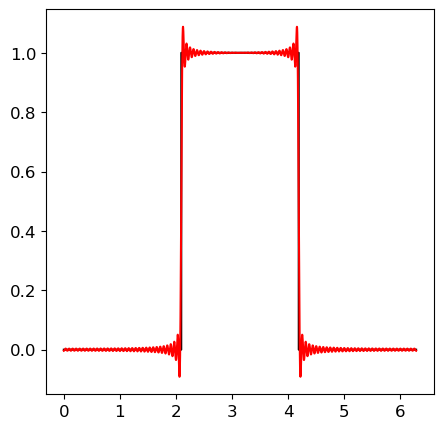

In [45]:
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams.update({'font.size': 12})
plt.plot(x,f,'k-')
plt.plot(x,fFS,'r-')